# INTRODUCTION

# BUSINESS UNDERSTANDING

# IMPORTATION

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Correlation
import phik

# Hyperparameter Tuning and Visualization
import optuna
import optuna.visualization as ov


# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.utils.class_weight import compute_class_weight

# Class Imbalance
from imblearn.over_sampling import SMOTE

# Modeling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Warnings
import warnings

warnings.filterwarnings('ignore')

c:\Users\KOJO\Desktop\WORKSPACE\AZUBI\CAREER ACCELERATOR\LP6-Sepsis-ML-Prediction-API\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DATA READING

In [2]:
# Read the Train and the Test set
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

# DATA UNDERSTANDING

### DATA DICTIONARY

| Column   Name                | Attribute/Target | Description                                                                                                                                                                                                  |
|------------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | N/A              | Unique number to represent patient ID                                                                                                                                                                        |
| PRG           | Attribute1       |  Plasma glucose|
| PL               | Attribute 2     |   Blood Work Result-1 (mu U/ml)                                                                                                                                                |
| PR              | Attribute 3      | Blood Pressure (mm Hg)|
| SK              | Attribute 4      | Blood Work Result-2 (mm)|
| TS             | Attribute 5      |     Blood Work Result-3 (mu U/ml)|                                                                                  
| M11     | Attribute 6    |  Body mass index (weight in kg/(height in m)^2|
| BD2             | Attribute 7     |   Blood Work Result-4 (mu U/ml)|
| Age              | Attribute 8      |    patients age  (years)|
| Insurance | N/A     | If a patient holds a valid insurance card|
| Sepssis                 | Target           | Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise |



In [3]:
# Get the first 5 rows of train set
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
# Get the last 5 rows of the train set
train.tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative
598,ICU200608,1,173,74,0,0,36.8,0.088,38,1,Positive


In [5]:
# Get the first 5 rows of test set
test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [6]:
# Get the last 5 rows of the test set
test.tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1
168,ICU200777,1,93,70,31,0,30.4,0.315,23,1


In [7]:
# Check for the number of rows and columns in the train dataset
train.shape

(599, 11)

In [8]:
# Check for the number of rows and columns in the test dataset
test.shape

(169, 10)

In [9]:
# Get more information on the train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [10]:
# Get more information on the test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [11]:
# Check for duplicates for train
train.duplicated().sum()

0

In [12]:
# Check for duplicates for test
test.duplicated().sum()

0

In [13]:
# Summary statistics for train (Exclude Object Columns)
train.describe(exclude='object')

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# Summary statistics for train (Exclude Int and Float Columns)
train.describe(exclude=['int64', 'float64'])

,ID,Sepssis
count,599,599
unique,599,2
top,ICU200010,Negative
freq,1,391


In [15]:
# Distribution of the Target
train['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

# DATA ASSESSMENT

Following data gathering from various sources, a comprehensive assessment was conducted to evaluate quality issues both visually and programmatically.

### DATA QUALITY ISSUES

- The target column 'Sepssis' contains 'Positive' and 'Negative' instead of numerical values (0 and 1).

- Rename the 'Sepssis' column to 'sepsis' for consistency and clarity.


# HYPOTHESIS

Sepsis, a life-threatening condition, is a leading cause of mortality in intensive care units. While lack of insurance and age differences has been associated with higher in-hospital mortality due to sepsis, the reasons behind this disparity remain unclear. Insurance can facilitate timely access to care, potentially impacting sepsis outcomes and age is a factor that is likely to determine sepsis-related hospitalization.

With this, I investigate two hypothesis

#### HYPOTHESIS 1

**Null Hypothesis (H0):** Holding medical insurance has no significant association with the probability of developing sepsis in ICU patients.

**Alternative Hypothesis (H1):** Holding medical insurance is associated with a significant difference in the probability of developing sepsis in ICU patients.

#### HYPOTHESIS 2

**Null Hypothesis (H0):** There is no association between the occurrence of sepsis and the age of ICU patients.

**Alternative Hypothesis (H1):** There is a significant association between the occurrence of sepsis and the age of ICU patients.


# ANALYTICAL QUESTIONS


1. **Distribution of Patient Ages :** Explore the age distribution among patients.
   

2. **Variation of Plasma Glucose (PRG) with Sepsis :** Assess the differences in Plasma Glucose levels between patients with positive and negative sepsis.
  

3. **Relationship between Age and Body Mass Index (M11) :** Explore the connection between patient age and Body Mass Index (BMI).
  

4. **Variation of Blood Pressure (PR) with Plasma Glucose (PRG) :** Determine the relationship between Blood Pressure and Plasma Glucose levels.
  

5. **Distribution of Sepsis based on Insurance Status :** Examine the distribution of sepsis occurrences concerning patients' insurance status.
 

# DATA CLEANING

In [16]:
# Rename Sepssis to Sepsis for clarity
train.rename({'Sepssis': 'Sepsis'}, axis=1, inplace=True)

In [17]:
# Confirm Changes
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


# HYPOTHESIS TESTING

In [18]:
sample = train.copy()

In [5]:
sample['Sepssis'] = sample['Sepssis'].map({'Positive': 1, 'Negative': 0})

<Axes: >

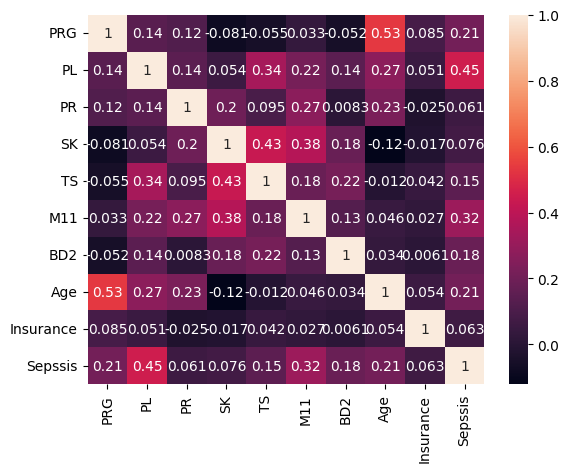

In [23]:
sns.heatmap(sample.drop('ID', axis=1).corr(), annot=True)

In [25]:
sample['Sepssis'].unique()

array([1, 0], dtype=int64)

In [29]:
sample.groupby('Sepssis')['Insurance'].mean()

Sepssis
0    0.664962
1    0.725962
Name: Insurance, dtype: float64

In [30]:
import scipy.stats as stats

In [31]:
neg_with_insurance = sample[sample['Sepssis'] == 0]['Insurance']
pos_with_insurance = sample[sample['Sepssis'] == 1]['Insurance']

In [34]:
t_statistic, p_value = stats.ttest_ind(neg_with_insurance, pos_with_insurance)

In [35]:
p_value

0.12602614781543303

In [36]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'data' is your DataFrame containing 'Sepssis' and 'Insurance' columns

# Creating a contingency table
contingency_table = pd.crosstab(sample['Sepssis'], sample['Insurance'])

# Performing chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Displaying results
print("Chi-Squared Statistic:", chi2)
print("P-Value:", p_value)

# Interpretation of p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant association between sepsis and insurance status.")
else:
    print("Fail to Reject Null Hypothesis: No significant association between sepsis and insurance status.")


Chi-Squared Statistic: 2.0712782081677066
P-Value: 0.1500956791860619
Fail to Reject Null Hypothesis: No significant association between sepsis and insurance status.


In [38]:
import scipy.stats as stats

# Filtering data for insured and uninsured patients
insured = sample[sample['Sepssis'] == 1]['Age']
uninsured = sample[sample['Sepssis'] == 0]['Age']

# Performing Independent T-Test
t_stat, p_value = stats.ttest_ind(insured, uninsured, equal_var=False)

# Printing the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation of p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in ages between insured and uninsured patients.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in ages between insured and uninsured patients.")


T-Statistic: 5.398028835705048
P-Value: 1.085959278630566e-07
Reject Null Hypothesis: There is a significant difference in ages between insured and uninsured patients.


1. How does the distribution of Plasma Glucose (PRG) vary between patients with positive and negative sepsis?

In [8]:
fig = px.box(sample, x='Sepssis', y='PRG', title='Distribution of Plasma Glucose by Sepsis')
fig.show()

Is there a relationship between Age and Body Mass Index (M11)?

In [9]:
fig = px.scatter(sample, x='Age', y='M11', title='Age vs. Body Mass Index')
fig.show()

In [6]:
# Assuming 'data' is your DataFrame
fig = px.histogram(sample, x='Sepssis', color='Insurance', barmode='group', title='Sepsis Distribution by Insurance Status')
fig.show()


# DATA PREPROCESSING

In [19]:
# Create a copy of train set for preprocessing
clean_train = train.copy()

In [20]:
# Covert the Sepsis column to have 0 and 1 
clean_train['Sepsis'] = clean_train['Sepsis'].map({'Positive': 1, 'Negative': 0})

In [21]:
# Confirm Changes
clean_train['Sepsis'].value_counts()

Sepsis
0    391
1    208
Name: count, dtype: int64

In [22]:
# Check for missing values
clean_train.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepsis       0
dtype: int64

In [23]:
# Save clean_train for reproducibility 
clean_train.to_csv('../data/processed/clean_train.csv', index=False)

### FEATURE SELECTION

In [24]:
# Calculate the phik correlation matrix for the 'Sepsis' column
sepsis_corr = clean_train.phik_matrix().loc['Sepsis']

interval columns not set, guessing: ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance', 'Sepsis']


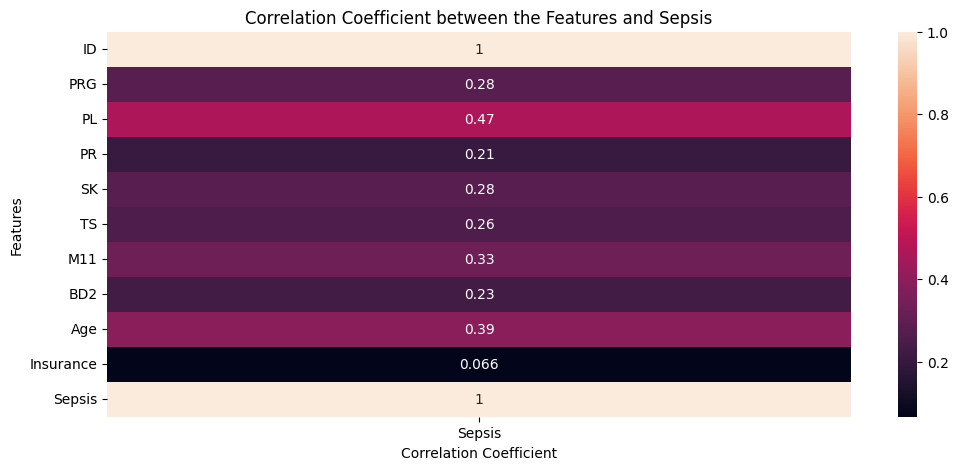

In [25]:
# Set the figure size for the heatmap
plt.figure(figsize=(12, 5))

# Create a heatmap with annotations
sns.heatmap(sepsis_corr.to_frame(), annot=True)

# Set the title for the heatmap
plt.title('Correlation Coefficient between the Features and Sepsis')

# Set the labels for the y-axis and x-axis
plt.ylabel('Features')
plt.xlabel('Correlation Coefficient')

# Show the heatmap
plt.show()

# DATA PREPARATION

The Insurance feature is dropped based on the conclusion from the hypothesis conducted and also the correlation coefficient in relation to Sepsis (Very week positive correlation of 0.066)

In [26]:
# Split the data into features (X) and the target variable (y)
X = clean_train.drop(['ID','Insurance','Sepsis'], axis=1).copy()
y = clean_train['Sepsis']

In [27]:
# Define a function to preprocess the data
def preprocess_data(df: pd.DataFrame):
    """
    Preprocess the data by scaling numerical columns.

    Parameters:
        df (DataFrame): data.

    Returns:
        preprocessed_data (array): Preprocessed data.
    """

    # Identify numerical columns
    num_cols = df.select_dtypes('number').columns

    # Create a ColumnTransformer to handle scaling
    preprocessor = ColumnTransformer([
        ('scale', StandardScaler(), num_cols),
    ], remainder='passthrough')
    
    # Preprocess (fit) the data
    preprocessor.fit(df)

    # Preprocess (transform) the data
    preprocessed_data = preprocessor.transform(df)

    # Get the transformer
    scaler = preprocessor.named_transformers_['scale']

    # Access the feature names using the get_feature_names_out() method
    scaled_feature_names = scaler.get_feature_names_out(input_features=num_cols)

    # Form a list of the features
    feature_names = list(scaled_feature_names)

    return preprocessed_data, feature_names, preprocessor


In [28]:
# Preprocess the training data and retrieve the feature names
X_preprocessed, feature_names, _,= preprocess_data(X)

In [29]:
# Confirm changes
pd.DataFrame(X_preprocessed, columns=feature_names)

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,0.647402,0.852744,0.169109,0.902098,-0.682191,0.209955,0.432333,1.413836
1,-0.840679,-1.076512,-0.141457,0.527197,-0.682191,-0.664876,-0.386002,-0.193804
2,1.242635,1.924553,-0.244979,-1.284822,-0.682191,-1.077297,0.565757,-0.109191
3,-0.840679,-0.954020,-0.141457,0.152297,0.124823,-0.477412,-0.931558,-1.039930
4,-1.138295,0.515890,-1.487246,0.902098,0.760132,1.397227,5.357163,-0.024579
...,...,...,...,...,...,...,...,...
594,0.647402,0.087166,0.169109,1.526932,1.292417,0.209955,0.746620,0.060034
595,-1.138295,2.077668,0.686720,-0.410054,0.906081,0.009994,0.595406,-0.955317
596,-1.138295,-1.627728,0.376154,-1.284822,-0.682191,1.672174,-0.851503,1.075385
597,-0.840679,-0.954020,-2.315423,-0.097637,-0.467559,-0.514905,0.230714,-1.039930


### HANDLE CLASS IMBALANCE - THE SMOTE METHOD
In the context of the project, I encountered a class imbalance issue within the target variable, "Sepsis". This means that the number of instances belonging to each class (Positive or Negative) was not balanced, potentially leading to skewed model performance.

To tackle this challenge, I used the Synthetic Minority Over-sampling Technique (SMOTE). This ingenious technique generates synthetic samples for the minority class, in my case, the Sepsis, with the goal of achieving a more balanced class distribution. The strategy behind SMOTE is to alleviate the class imbalance problem by creating synthetic instances that lie between existing instances of the minority class.

In [30]:
# Apply SMOTE to the entire dataset
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=12)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [31]:
# Confirm changes after using SMOTE to handle class imbalance
pd.DataFrame(X_resampled).shape, pd.DataFrame(y_resampled).shape

((782, 8), (782, 1))

In [32]:
# Class distribution of y after resampling 
pd.value_counts(pd.Series(y_resampled))

Sepsis
1    391
0    391
Name: count, dtype: int64

Before applying SMOTE, our class distribution indicated a significant disparity:

- Negative (Class 0): 391 instances
- Positive (Class 1): 208 instances

By applying SMOTE with parameters "sampling_strategy='auto', k_neighbors=5, random_state=12," I effectively increased the number of instances in the minority class. The result was a balanced class distribution:

- Negative (Class 0): 391 instances
- Positive (Class 1): 391 instances

This rebalanced distribution sets the stage for more accurate and reliable model training and evaluation. By addressing the class imbalance using SMOTE, I ensure that the predictive models are not biased toward the majority class and can accurately capture patterns and insights from both classes.

### TRAIN - VAL SPLIT

In [33]:
# Split the data into training and validation sets with a test size of 20% and random state of 12
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=12, stratify=y_resampled)

# Print the shapes of the training and validation sets to check the split
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(625, 8) (157, 8) (625,) (157,)


I executed the crucial step of splitting our data into training and validation sets using the `train_test_split` function.  In the `test_size`, I allocated 20% of the data to the validation set. 

The `stratify` parameter helps maintain the balanced class distribution in both the training and testing sets. Since we've previously balanced the classes using SMOTE, it's important to preserve this balance during the data split. 

This ensured that the model's training phase was conducted on one subset, while its performance assessment was carried out on an unseen subset. By integrating SMOTE and data splitting, I not only alleviated class imbalance concerns but also ensured a robust evaluation of the model's generalization capabilities.

# MODELING

### MODEL SELECTION

1 consider five (5) models for Sepsis prediction:

1. Ada Boost Classifier
2. SDG Classifier
3. Random Forest Classifier
4. XGB Classifier
5. Gradient Boosting Classifier

We evaluate each model's performance using cross-validation to ensure reliable metrics. The key evaluation metric used is accuracy.

In [34]:
models = [
    ('Ada Boost Classifier', AdaBoostClassifier(random_state=12)),
    ('SDG Classifier', SGDClassifier(random_state=12)),
    ('Random Forest Classifier', RandomForestClassifier(random_state=12)),
    ('XGB Classifier', XGBClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=12)),
]

# Create an empty dictionary to store the results
results = {
    'Model': [],
    'Accuracy': []
}

# Loop through each model and calculate performance metrics using cross-validation
for model_name, model in models:
    
    # Define the scoring metrics to calculate
    scoring = ['accuracy']

    # Perform cross-validation and get the results
    cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

    # Store the average scores for each metric in the results dictionary
    results['Model'].append(model_name)
    results['Accuracy'].append(cv_results['test_accuracy'].mean())

In [35]:
# covert the results map to a DataFrame, Sort Values by Accuracy
results = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

# Confirm changes
results

,Model,Accuracy
2,Random Forest Classifier,0.803277
3,XGB Classifier,0.790476
4,Gradient Boosting Classifier,0.761674
0,Ada Boost Classifier,0.750461
1,SDG Classifier,0.556938


### MODEL PERFORMANCE VISUALIZATION

To visually compare model performances, I create a bar plot using Plotly Express. The bar plot displays the accuracy metric for each model, providing an easy-to-understand representation of their relative performances.


In [36]:
# Plot the bar graph
fig = px.bar(results, x='Model', y='Accuracy',
             title='Model Performance Metrics',
             labels={'Model': 'Model Name', 'Accuracy': 'Mean Accuracy Score (5 Folds)'}
            )

# Show the plot
fig.show()

The `Random Forest Classifier` stands out as the best-performing model due to its highest accuracy among the evaluated models `(80.37%)`. As accuracy is a key performance metric for the project, selecting the Random Forest Classifier ensures that I prioritize correctly predicting Sepsis (either Positive or Negative ) in the future predictions on the test dataset.

This combination of high accuracy, and interpretability makes the Random Forest Classifier an ideal choice for addressing the project's goals of identifying predicting Sepsis in patients.

# MODEL EVALUATION

A comprehensive evaluation of the Random Forest Classifier will be conducted using the validation set to identify its optimal performance. 

The evaluation primarily focused on analyzing the models' performance through the lens of the confusion matrix. This matrix provides a detailed breakdown of the model's predictions, allowing us to make informed decisions about its effectiveness.

In [37]:
# Create a function to generate the classification report and also plot the confusion matrix

def get_model_performance(y_val, y_pred):
    """
    Generate a classification report and plot a confusion matrix using Plotly Express.

    Parameters:
    y_val (array-like): The true labels.
    y_pred (array-like): The predicted labels.
   
    Returns:
    None
        The function prints the classification report and displays the confusion matrix plot.
    """

    # Define a custom color scale
    custom_color_scale = [[0.0, "#835AF1"],
                        [0.5, "#37AA9C"],
                        [1.0, "#B8F7D4"]] 

    # Define class labels
    class_labels = ['Negative', 'Positive']

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    
    
    # Create classification report
    report = classification_report(y_val, y_pred, target_names=class_labels)

    # Print report
    print(report)

    # Create a DataFrame for the confusion matrix
    conf_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

    # Create a heatmap with annotations
    fig = px.imshow(conf_df,
                    labels=dict(x='Predicted', y='Actual'),
                    x=class_labels,
                    y=class_labels,
                    color_continuous_scale=custom_color_scale)

    # Add annotations to display the values within the cells
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            fig.add_annotation(x=class_labels[j], y=class_labels[i],
                            text=str(conf_matrix[i, j]),
                            showarrow=False, font=dict(size=16, color='white'))

    # Customize the layout
    fig.update_layout(title='Confusion Matrix',
                    xaxis_title='Predicted',
                    yaxis_title='Actual')

    # Show the plot
    fig.show()

In [38]:
# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=12)

# Fit the RandomForestClassifier model on the training data
rf_model.fit(X_train, y_train)

# Predict the labels on the validation data using the trained model
rf_y_pred = rf_model.predict(X_val)

# Evaluate the model performance using the get_model_performance function and display results
get_model_performance(y_val, rf_y_pred)

              precision    recall  f1-score   support

    Negative       0.89      0.82      0.85        78
    Positive       0.84      0.90      0.87        79

    accuracy                           0.86       157
   macro avg       0.86      0.86      0.86       157
weighted avg       0.86      0.86      0.86       157



- **Precision for Positive class (Se psis):** 0.84 means that among the predicted positive cases, 84% are correctly identified as patients who will develop sepsis.
- **Recall for Positive class (Sepsis):** 0.90 means that the model identifies 90% of the actual patients who will develop sepsis.
- **F1-score for Positive class (Sepsis):** 0.87 is the harmonic mean of precision and recall for the class, providing a balance between precision and recall.

- **Precision Negative class (No Sepsis):** 0.89 signifies that among the predicted negative cases, 89% are accurately identified as patients who will not develop sepsis.
- **Recall Negative class (No Sepsis):** 0.82 implies that the model captures 82% of the actual patients who will not develop sepsis.
- **F1-score Negative class (No Sepsis):** 0.85 is the harmonic mean of precision and recall for the 'No Sepsis' class.

**False Positives (FP):** These are cases where the model predicted 'Positive' (developing sepsis), but the actual label was 'Negative' (no sepsis). It represents 100% - Precision(Positive), so FP rate is 0.16 or 16%.

**False Negatives (FN):** These are cases where the model predicted 'Negative' (no sepsis), but the actual label was 'Positive' (developing sepsis). It represents 100% - Recall(Positive), so FN rate is 0.10 or 10%.

The model's false positive rate is 16%, meaning that 16% of cases predicted as 'Positive' were actually 'Negative' (no sepsis). The false negative rate is 10%, indicating that 10% of actual 'Positive' cases were incorrectly predicted as 'Negative' (no sepsis).

# MODEL IMPROVEMENT

Here, hyperparameter tuning will be performed using Optuna on the Random Forest Classifier model.

### USING OPTUNA

Optuna is an open-source Python library for hyperparameter optimization. Developed by the Japanese company Preferred Networks, Optuna provides an elegant and automated way to search for the best hyperparameters by optimizing an objective function. It is designed to be user-friendly and highly adaptable to different machine learning frameworks.

Optuna operates based on a three-step process:

1. **Define the Search Space:** Users specify the range and type of hyperparameters to optimize, such as integer, float, or categorical values. This step defines the search space that Optuna will explore.

2. **Define the Objective Function:** The objective function is the core of the optimization process. It evaluates the performance of the model for a given set of hyperparameters. Optuna aims to minimize or maximize this function, depending on the optimization goal.

3. **Optimization:** Optuna uses Bayesian optimization to sample different hyperparameter configurations. It iteratively evaluates these configurations and updates the probabilistic model, narrowing down the search space. The process continues until a satisfactory set of hyperparameters is found.

In [39]:
# Define the objective function
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 2, 32)

    # Define Model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

    # Perform Cross Validation
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=10)

    # Calculate Accuracy
    accuracy = score.mean()

    return accuracy

In [40]:
# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2023-11-17 14:27:13,811] A new study created in memory with name: no-name-28f29683-0f39-4561-a479-33f453dabd15
Best trial: 0. Best value: 0.804916:   5%|▌         | 1/20 [00:16<05:04, 16.04s/it]

[I 2023-11-17 14:27:29,880] Trial 0 finished with value: 0.8049155145929339 and parameters: {'n_estimators': 178, 'max_depth': 17}. Best is trial 0 with value: 0.8049155145929339.


Best trial: 0. Best value: 0.804916:  10%|█         | 2/20 [00:25<03:43, 12.44s/it]

[I 2023-11-17 14:27:39,777] Trial 1 finished with value: 0.7985151049667178 and parameters: {'n_estimators': 122, 'max_depth': 14}. Best is trial 0 with value: 0.8049155145929339.


Best trial: 0. Best value: 0.804916:  15%|█▌        | 3/20 [00:33<02:56, 10.41s/it]

[I 2023-11-17 14:27:47,769] Trial 2 finished with value: 0.8033282130056323 and parameters: {'n_estimators': 159, 'max_depth': 29}. Best is trial 0 with value: 0.8049155145929339.


Best trial: 0. Best value: 0.804916:  20%|██        | 4/20 [00:34<01:46,  6.68s/it]

[I 2023-11-17 14:27:48,735] Trial 3 finished with value: 0.7953149001536097 and parameters: {'n_estimators': 13, 'max_depth': 30}. Best is trial 0 with value: 0.8049155145929339.


Best trial: 4. Best value: 0.814491:  25%|██▌       | 5/20 [00:41<01:41,  6.78s/it]

[I 2023-11-17 14:27:55,695] Trial 4 finished with value: 0.8144905273937532 and parameters: {'n_estimators': 116, 'max_depth': 15}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  30%|███       | 6/20 [00:51<01:47,  7.71s/it]

[I 2023-11-17 14:28:05,189] Trial 5 finished with value: 0.8000768049155147 and parameters: {'n_estimators': 147, 'max_depth': 31}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  35%|███▌      | 7/20 [01:00<01:47,  8.26s/it]

[I 2023-11-17 14:28:14,580] Trial 6 finished with value: 0.7823860727086533 and parameters: {'n_estimators': 180, 'max_depth': 6}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  40%|████      | 8/20 [01:08<01:35,  7.97s/it]

[I 2023-11-17 14:28:21,946] Trial 7 finished with value: 0.7712237583205324 and parameters: {'n_estimators': 182, 'max_depth': 4}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  45%|████▌     | 9/20 [01:11<01:11,  6.50s/it]

[I 2023-11-17 14:28:25,213] Trial 8 finished with value: 0.7840245775729646 and parameters: {'n_estimators': 64, 'max_depth': 7}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  50%|█████     | 10/20 [01:17<01:03,  6.36s/it]

[I 2023-11-17 14:28:31,272] Trial 9 finished with value: 0.796774193548387 and parameters: {'n_estimators': 125, 'max_depth': 10}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  55%|█████▌    | 11/20 [01:21<00:51,  5.70s/it]

[I 2023-11-17 14:28:35,442] Trial 10 finished with value: 0.8048643113159241 and parameters: {'n_estimators': 77, 'max_depth': 23}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  60%|██████    | 12/20 [01:26<00:43,  5.46s/it]

[I 2023-11-17 14:28:40,383] Trial 11 finished with value: 0.8048387096774194 and parameters: {'n_estimators': 87, 'max_depth': 18}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  65%|██████▌   | 13/20 [01:28<00:31,  4.51s/it]

[I 2023-11-17 14:28:42,695] Trial 12 finished with value: 0.8097286226318484 and parameters: {'n_estimators': 34, 'max_depth': 18}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  70%|███████   | 14/20 [01:31<00:23,  3.84s/it]

[I 2023-11-17 14:28:44,971] Trial 13 finished with value: 0.8065028161802354 and parameters: {'n_estimators': 32, 'max_depth': 23}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  75%|███████▌  | 15/20 [01:36<00:21,  4.25s/it]

[I 2023-11-17 14:28:50,141] Trial 14 finished with value: 0.7985663082437275 and parameters: {'n_estimators': 51, 'max_depth': 12}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  80%|████████  | 16/20 [01:46<00:23,  5.99s/it]

[I 2023-11-17 14:29:00,196] Trial 15 finished with value: 0.8065028161802357 and parameters: {'n_estimators': 101, 'max_depth': 21}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  85%|████████▌ | 17/20 [01:54<00:20,  6.77s/it]

[I 2023-11-17 14:29:08,788] Trial 16 finished with value: 0.8033026113671274 and parameters: {'n_estimators': 118, 'max_depth': 17}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  90%|█████████ | 18/20 [01:58<00:11,  5.85s/it]

[I 2023-11-17 14:29:12,488] Trial 17 finished with value: 0.806605222734255 and parameters: {'n_estimators': 44, 'max_depth': 26}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491:  95%|█████████▌| 19/20 [02:08<00:06,  6.93s/it]

[I 2023-11-17 14:29:21,936] Trial 18 finished with value: 0.7969278033794163 and parameters: {'n_estimators': 145, 'max_depth': 14}. Best is trial 4 with value: 0.8144905273937532.


Best trial: 4. Best value: 0.814491: 100%|██████████| 20/20 [02:10<00:00,  6.52s/it]

[I 2023-11-17 14:29:24,279] Trial 19 finished with value: 0.7952892985151049 and parameters: {'n_estimators': 18, 'max_depth': 20}. Best is trial 4 with value: 0.8144905273937532.


After the optimization process is finished, we can see the best trial and the best hyperparameters that Optuna found.

In [41]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=4, state=1, values=[0.8144905273937532], datetime_start=datetime.datetime(2023, 11, 17, 14, 27, 48, 760887), datetime_complete=datetime.datetime(2023, 11, 17, 14, 27, 55, 693807), params={'n_estimators': 116, 'max_depth': 15}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=False, low=10, step=1), 'max_depth': IntDistribution(high=32, log=False, low=2, step=1)}, trial_id=4, value=None)
Best hyperparameters: {'n_estimators': 116, 'max_depth': 15}


### HYPERPARAMETER PROCESS VISUALIZATION

We can also visualize the optimization process using Optuna's built-in visualization functions. These functions use Plotly to create interactive plots that show various aspects of the optimization process

In [42]:
# Plot optimization history
ov.plot_optimization_history(study)

The optimization history plot shows how the MAE changes over the number of trials. It also shows the best value so far and the percentile range of the values. You can see that the MAE decreases rapidly in the first few trials, then stabilizes around 0.4, and reaches the lowest value of 0.327 at trial 16.

In [43]:
# Plot parameter importance
ov.plot_param_importances(study)

The parameter importance plot shows how much each hyperparameter contributes to the MAE. It uses a permutation-based method to calculate the importance scores. You can see that n_estimators is the most important parameter, followed by max_depth, min_samples_split, and min_samples_leaf. This means that changing the number of trees in the random forest has the most impact on the model performance, while changing the minimum number of samples required to be at a leaf node has the least impact.

In [44]:
# Plot parallel_coordinate
ov.plot_parallel_coordinate(study)

The parallel coordinate plot shows how each hyperparameter affects the MAE across all trials. It also shows the color gradient that indicates the MAE level. You can see that higher values of n_estimators and max_depth, and lower values of min_samples_split and min_samples_leaf are associated with lower MAE. You can also see how different combinations of hyperparameters result in different levels of MAE.

In [46]:
# Define RandomForestClassifier with the hyperparameters identified
best_rf_model = RandomForestClassifier(n_estimators=list(study.best_params.values())[0], max_depth=list(study.best_params.values())[1], random_state=12)

# Fit the best RandomForestClassifier model on the training data
best_rf_model.fit(X_train, y_train)

# Predict the labels on the validation data using the trained model
best_rf_model_y_pred = best_rf_model.predict(X_val)

# Evaluate the best model on the validation set
best_accuracy = best_rf_model.score(X_val, y_val)
print('The accuracy of the Model is: ', best_accuracy)

# Evaluate the model performance using the get_model_performance function and display results
get_model_performance(y_val, best_rf_model_y_pred)

The accuracy of the Model is:  0.8535031847133758
              precision    recall  f1-score   support

    Negative       0.90      0.79      0.84        78
    Positive       0.82      0.91      0.86        79

    accuracy                           0.85       157
   macro avg       0.86      0.85      0.85       157
weighted avg       0.86      0.85      0.85       157



Upon conducting hyperparameter tuning, the slight adjustment in the confusion matrix demonstrates the refined predictive capability of the model, with improved accuracy in correctly classifying instances of patients in ICU developing Sepsis (Positive) or not (Negative).

# FUTURE PREDICTIONS

### PREPROCESS TEST SET

In [47]:
# Store the PatientID column before dropping it from the test data
patientID = test['ID']

# Drop the PatientID and Insurance columns from the test data
test.drop(['ID', 'Insurance'], axis=1, inplace=True)

# Preprocess the test data using the preprocessor function
X_test_preprocessed, X_test_feature_names, test_preprocessor = preprocess_data(test)

### PERFORM PREDICTIONS

In [49]:
# Predict the labels on the preprocessed test data using the trained model
test_y_pred = rf_model.predict(X_test_preprocessed)

# Create a DataFrame to store the predicted results
predicted_result = pd.DataFrame({'ID': patientID, 'Sepsis': np.where(test_y_pred == 1, 'Positive', 'Negative')})

# Display the count of predicted patients who are likely to develop sepsis or not
sepsis_counts = predicted_result['Sepsis'].value_counts()
print(sepsis_counts)

Sepsis
Negative    169
Name: count, dtype: int64
